<a href="https://colab.research.google.com/github/Chinmaya54/DM_Challenge_WC_Winner/blob/Riya/Data_Mining_CP_03_Riya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK**

**Player historic dataset :** https://www.kaggle.com/datasets/abhi211b/icc-cricket-world-cup-2023-prediction-statistics

**Related to BATSMAN**
- Predicting the batsman who will score most runs.
- Predicting the batsman who will hit most sixes.
- Predicting the batsman who will make the most centuries in the tournament.

**Related to BOWLER**
- Predicting the bowler who will be the leading wicket-taker in the tournament.

**Related to INDIVIDUAL player**
- Predicting the number of sixes/boundaries/5-wicket hauls/hundreds in this tournament for an individual player or team.

**Related to MATCH**
- Predicting what to choose on winning the toss in finals

##**General statistics**

1. **Matches (Mat):** Number of matches played. (also Played (Pl).)

**Catches (Ct):** Number of catches taken.

**Stumpings (St):** Number of stumpings made (as a wicket-keeper).

##**Batting statistics**

 **Innings (I):** The number of innings in which the batsman actually batted.

**Not outs (NO):** The number of times the batsman was not out at the conclusion of an innings they batted in.1

**Runs (R):** The number of runs scored.

**4's:**The number of 4's the batsmen has scored.

**6's:** The number of 6's the batsmen has scored.

**Highest score (HS) :** The highest score ever made by the batsman.

**Batting average (Avg):** The total number of runs divided by the total number of innings in which the batsman was out. Ave = Runs/[I – NO] (also Avge or Avg.)

**Centuries (100):**The number of innings in which the batsman scored one hundred runs or more.

**Half-centuries (50):** The number of innings in which the batsman scored fifty to ninety-nine runs (centuries do not count as half-centuries as well).

**Balls faced (BF):** The total number of balls received, including no-balls but not including wides.

**Strike rate (SR):** The average number of runs scored per 100 balls faced. (SR = [100 * Runs]/BF)


##**Bowling statistics**

**Overs (O or OV):** The number of overs bowled. The notation is (x.y), meaning x completed overs plus y legal balls in the current over have been bowled.

**Maiden overs (M):** The number of maiden overs (overs in which the bowler conceded zero runs) bowled.

**Runs (R):** The number of runs conceded.

**Wickets (W):** The number of wickets taken.

**Bowling average (Avg):** The average number of runs conceded per wicket. (Ave = Runs/W)

**Strike rate (SR):** The average number of balls bowled per wicket taken. (SR = Balls/W)

**Economy rate (Econ):** The average number of runs conceded per over. (Econ = Runs/Overs bowled).

**Best bowling (BB):** The bowler's best bowling performance, defined as firstly the greatest number of wickets, secondly the fewest runs conceded for that number of wickets. (Thus, a performance of 7 for 102 is considered better than one of 6 for 19.)
- **BBI** stands for Best Bowling in Innings and only gives the score for one innings. (If only the BB rate is given it's considered the BBI rate.)
- **BBM** stands for Best Bowling in Match and gives the combined score over 2 or more innings in one match. (For limited-overs matches with one innings per side, this score is equal to the BBI or BB.)

**Five wickets in an innings (5w):** The number of innings in which the bowler took at least five wickets. Four wickets in an innings (4w), the number of innings in which the bowler took exactly four wickets, is sometimes recorded alongside five wickets, especially in limited overs cricket.

**Ten wickets in a match (10w):** The number of matches in which the bowler took at least ten wickets; recorded for Tests and first-class matches only.

#Importing Data

In [294]:
# Mounting Google drive to fetch dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [295]:
import pandas as pd

In [296]:
df = pd.read_csv('/content/drive/MyDrive/Players Stat.csv')

In [297]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr',False)

In [298]:
df.head()

,Id,Team,Type,Career,Context,Span,Mat,Inns,HS,BF,SR,100s,50s,0s,4s,6s,Avg,NO,Overs,Mdns,Runs,Wkts,Econ,4w,5w,10w,BBI,BBM
0,hashmatullah shahidi,Afghanistan,Top order Batter,2013 - 2023,overview,0,2018-2023,6,375,53.57,833,45.01,0,1,0,46,200*,12,0,0,5,0,0,0,0,0,0,0
1,hashmatullah shahidi,Afghanistan,Top order Batter,2013 - 2023,vs Bangladesh,0,2019-2023,2,48,16.00,99,48.48,0,0,0,7,14,4,0,0,1,0,0,0,0,0,0,0
2,hashmatullah shahidi,Afghanistan,Top order Batter,2013 - 2023,vs India,0,2018-2018,1,47,47.00,112,41.96,0,0,0,8,36*,2,0,0,1,0,0,0,0,0,0,0
3,hashmatullah shahidi,Afghanistan,Top order Batter,2013 - 2023,vs Ireland,0,2019-2019,1,65,65.00,155,41.93,0,1,0,7,61,2,0,0,1,0,0,0,0,0,0,0
4,hashmatullah shahidi,Afghanistan,Top order Batter,2013 - 2023,vs Zimbabwe,0,2021-2021,2,215,107.50,467,46.03,0,0,0,24,200*,4,0,0,2,0,0,0,0,0,0,0


#Data Cleaning and Preprocessing

In [309]:
import pandas as pd
import re

# Function to remove non-numeric characters and convert to float
def to_numeric(column):
    column = column.astype(str)  # Explicitly convert to string
    return pd.to_numeric(column.str.extract('(\d+\.\d+|\d+)')[0], errors='coerce')

def to_numeric_BF(column):
    # Using regular expression to remove non-numeric characters
    column = column.astype(str)
    column = column.apply(lambda x: re.sub(r"[^\d.]", "", x))
    # Convert to float to handle any floating-point numbers and NaN values
    column = pd.to_numeric(column, errors='coerce')
    # Fill NaN values before converting to int
    return column.fillna(column.median()).astype(int)

# Apply the revised function to the 'BF' column
df['BF'] = to_numeric_BF(df['BF'])

# Apply this function to the relevant columns
df['HS'] = to_numeric_BF(df['HS'])
df['Inns'] = to_numeric(df['Inns']).fillna(df['Inns'].median())
df['BF'] = to_numeric_BF(df['BF']).fillna(df['BF'].median())
df['SR'] = to_numeric_BF(df['SR'])
df['6s'] = to_numeric_BF(df['6s'])
df['100s'] = to_numeric_BF(df['100s'])
df['Mdns'] = to_numeric_BF(df['Mdns'])
df['Wkts'] = to_numeric_BF(df['Wkts'])
df['Overs'] = to_numeric_BF(df['Overs'])
df['Econ'] = to_numeric_BF(df['Econ'])
df['BBI'] = to_numeric_BF(df['BBI'])
df['BBM'] = to_numeric_BF(df['BBM'])

# Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Team', 'Type', 'Career', 'Context', 'Mat']
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


# Feature engineering

In [310]:
# Adding new features like Batting Average and Strike Rate
df['Batting_Average'] = df['HS'] / df['Inns']
df['Strike_Rate'] = (df['4s']*4 + df['6s']*6) / df['BF']


In [311]:
df.columns

Index(['Id', 'Team', 'Type', 'Career', 'Context', 'Span', 'Mat', 'Inns', 'HS',
       'BF', 'SR', '100s', '50s', '0s', '4s', '6s', 'Avg', 'NO', 'Overs',
       'Mdns', 'Runs', 'Wkts', 'Econ', '4w', '5w', '10w', 'BBI', 'BBM',
       'Batting_Average', 'Strike_Rate'],
      dtype='object')

In [312]:
df.isnull().sum()

Id                    0
Team                  0
Type                  0
Career                0
Context               0
Span                  0
Mat                   0
Inns                  0
HS                    0
BF                    0
SR                    0
100s                  0
50s                   0
0s                    0
4s                    0
6s                    0
Avg                   0
NO                    0
Overs                 0
Mdns                  0
Runs                  0
Wkts                  0
Econ                  0
4w                    0
5w                    0
10w                   0
BBI                   0
BBM                   0
Batting_Average       6
Strike_Rate        4087
dtype: int64

In [313]:
df['4s'].unique()  #should drop '4s' as only 0 is present

array([0])

In [314]:
df['50s'].unique() #should drop '50s' as only 0 is present

array([0])

In [315]:
df['Span'].unique() #should drop 'Span' as only 0 is present

array([0])

In [316]:
df['5w'].unique()  #should drop '5w' as only 0 is present

array([0])

In [317]:
df['10w'].unique()  #should drop '5w' as only 0 is present

array([0])

In [318]:
df.head()

,Id,Team,Type,Career,Context,Span,Mat,Inns,HS,BF,SR,100s,50s,0s,4s,6s,Avg,NO,Overs,Mdns,Runs,Wkts,Econ,4w,5w,10w,BBI,BBM,Batting_Average,Strike_Rate
0,hashmatullah shahidi,0,7,8,170,0,147,6,375,53,833,45,0,1,0,46,200*,12,0,0,5,0,0,0,0,0,0,0,62.5,5.207547
1,hashmatullah shahidi,0,7,8,216,0,152,2,48,16,99,48,0,0,0,7,14,4,0,0,1,0,0,0,0,0,0,0,24.0,2.625000
2,hashmatullah shahidi,0,7,8,220,0,142,1,47,47,112,41,0,0,0,8,36*,2,0,0,1,0,0,0,0,0,0,0,47.0,1.021277
3,hashmatullah shahidi,0,7,8,222,0,148,1,65,65,155,41,0,1,0,7,61,2,0,0,1,0,0,0,0,0,0,0,65.0,0.646154
4,hashmatullah shahidi,0,7,8,235,0,157,2,215,107,467,46,0,0,0,24,200*,4,0,0,2,0,0,0,0,0,0,0,107.5,1.345794


#EDA

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Basic Statistics:")
df.describe()

Basic Statistics:


,Team,Type,Career,Context,Span,Mat,Inns,HS,BF,SR,100s,50s,4s,6s,Overs,Mdns,Wkts,Econ,5w,10w,BBI,BBM,Batting_Average,Strike_Rate
count,10541.000000,10541.000000,10541.000000,10541.000000,10541.0,10541.000000,10541.000000,10541.000000,10541.000000,10541.000000,10541.000000,10541.0,10541.0,10541.000000,10541.000000,10541.000000,10541.000000,10541.000000,10541.0,10541.0,10541.000000,10541.000000,10535.000000,6454.000000
mean,4.426335,3.933118,10.016792,158.608386,0.0,162.690257,9.953799,359.853904,21.900674,632.514183,36.914904,0.0,0.0,40.612560,4.790248,78.854758,260.393891,12.868893,0.0,0.0,9.303766,221.624514,30.275082,10.342770
std,2.772665,2.586270,4.318356,59.434341,0.0,61.417952,14.632152,838.180711,24.843478,1490.470580,33.409734,0.0,0.0,94.887225,13.706123,260.090259,795.552291,22.120480,0.0,0.0,30.497972,848.240684,34.149993,15.496311
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,7.000000,104.000000,0.0,127.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.000000
50%,4.000000,3.000000,10.000000,157.000000,0.0,152.000000,5.000000,53.000000,18.000000,92.000000,44.000000,0.0,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,22.000000,4.800000
75%,7.000000,6.000000,13.000000,206.000000,0.0,162.000000,11.000000,341.000000,36.000000,579.000000,59.000000,0.0,0.0,38.000000,4.000000,41.000000,163.000000,24.000000,0.0,0.0,5.000000,0.000000,52.867521,11.365602
max,9.000000,8.000000,19.000000,260.000000,0.0,299.000000,160.000000,11416.000000,221.000000,20113.000000,205.000000,0.0,0.0,1247.000000,178.000000,4185.000000,11569.000000,197.000000,0.0,0.0,489.000000,9129.000000,270.000000,149.640000


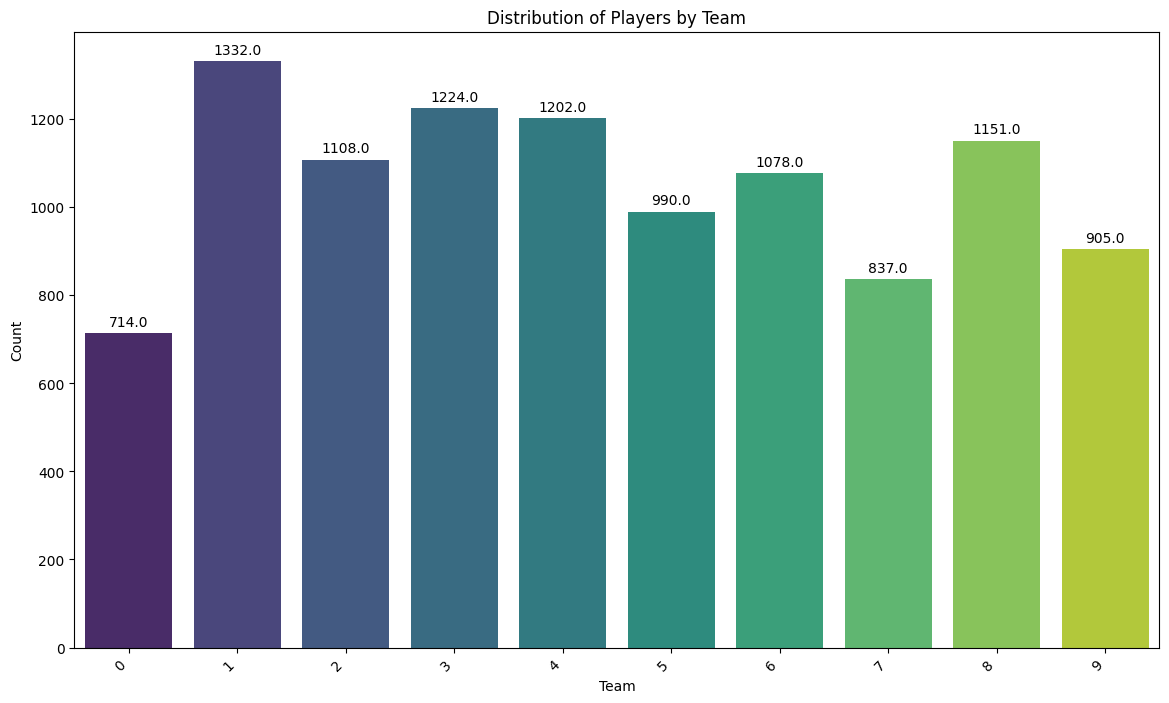

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Team', data=df, palette='viridis')

plt.title('Distribution of Players by Team')
plt.xlabel('Team')
plt.ylabel('Count')

# Adding labels for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', rotation=0, xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels for better visibility

plt.show()

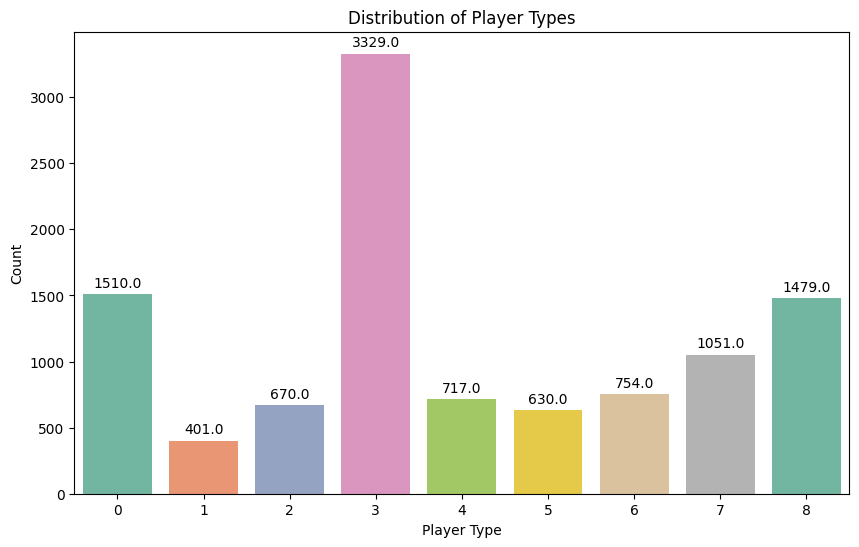

In [329]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Type', data=df, palette='Set2')

plt.title('Distribution of Player Types')
plt.xlabel('Player Type')
plt.ylabel('Count')

# Adding labels for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', rotation=0, xytext=(0, 5),
                textcoords='offset points')

plt.show()

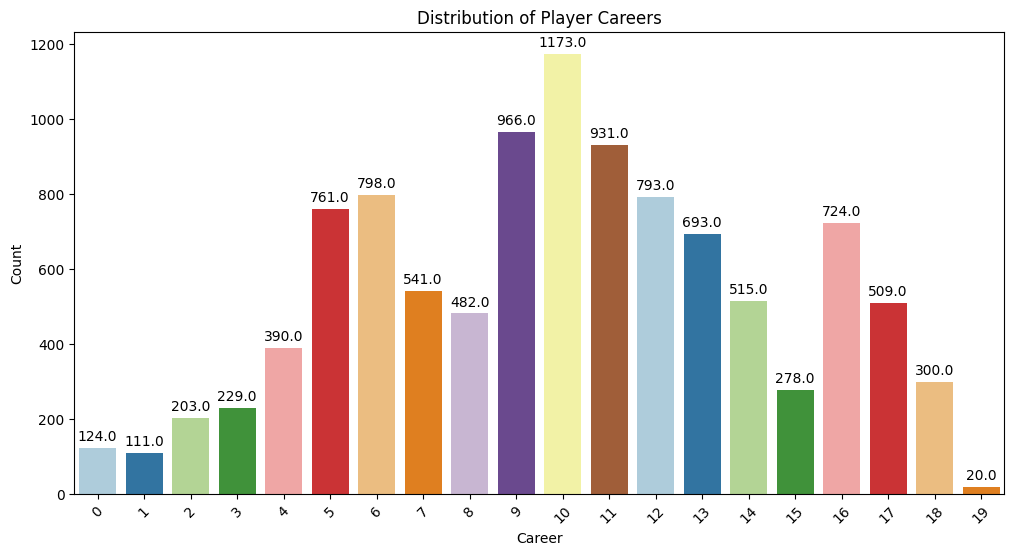

In [328]:
# Career distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Career', data=df, palette='Paired')

plt.title('Distribution of Player Careers')
plt.xticks(rotation=45)
plt.xlabel('Career')
plt.ylabel('Count')

# Adding labels for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', rotation=0, xytext=(0, 5),
                textcoords='offset points')

plt.show()


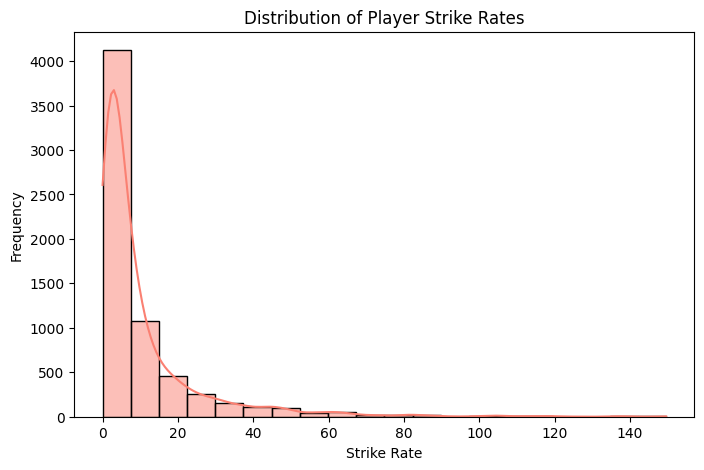

In [326]:
# Distribution of strike rates
plt.figure(figsize=(8, 5))
sns.histplot(df['Strike_Rate'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Player Strike Rates')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.show()

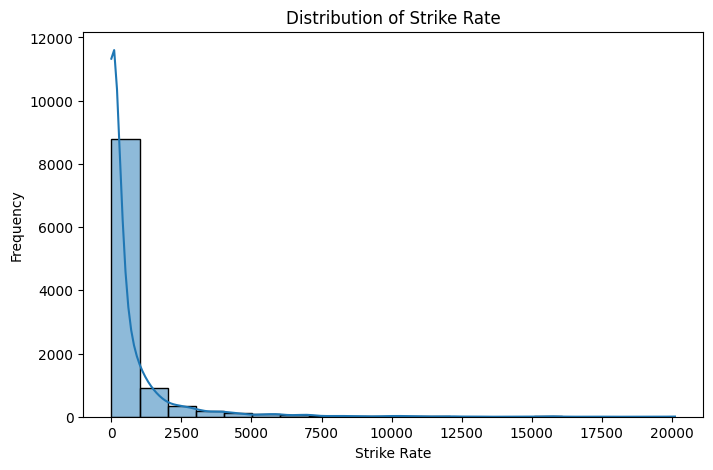

In [40]:
# Distribution of 'SR' (Strike Rate)
plt.figure(figsize=(8, 5))
sns.histplot(df['SR'], bins=20, kde=True)
plt.title('Distribution of Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.show()

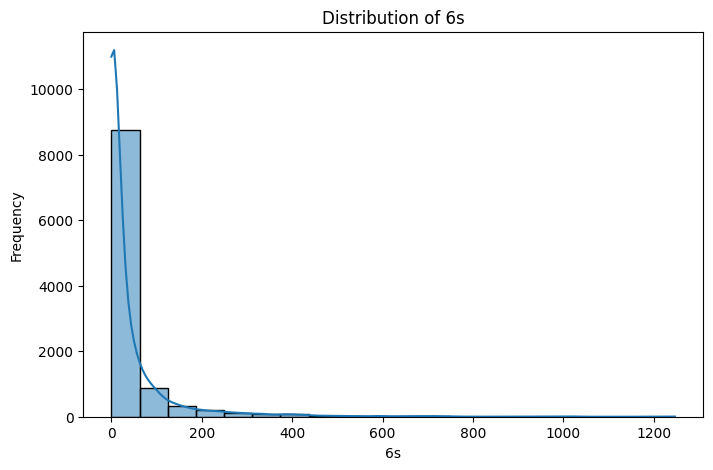

In [42]:
# Distribution of 6s
plt.figure(figsize=(8, 5))
sns.histplot(df['6s'], bins=20, kde=True)
plt.title('Distribution of 6s')
plt.xlabel('6s')
plt.ylabel('Frequency')
plt.show()

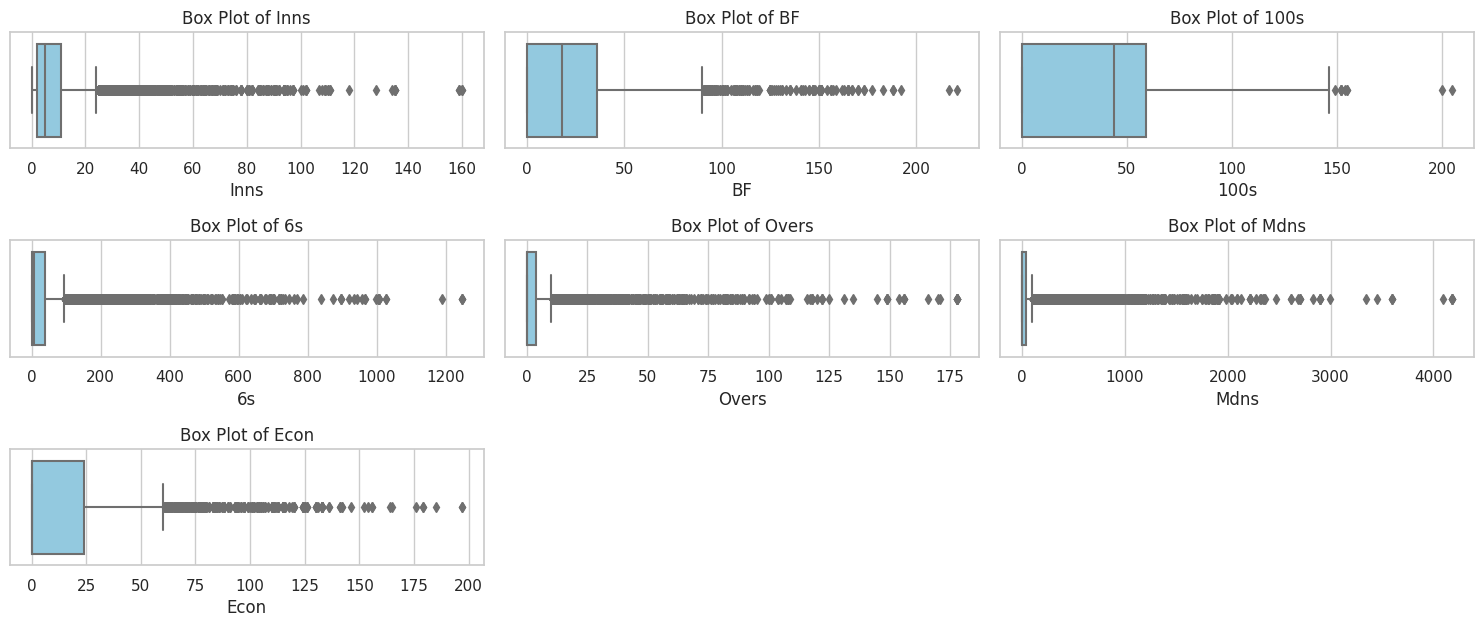

In [351]:
numerical_columns = ['Inns', 'BF', '100s', '6s', 'Overs',
                   'Mdns', 'Econ']

# Boxplots for numerical columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [43]:

# # Pairplot for selected numeric columns
# sns.pairplot(df[['Inns', 'BF', 'SR', '100s', 'Avg', 'Runs', 'Wkts']], diag_kind='kde')
# plt.suptitle('Pairplot of Selected Columns', y=1.02)
# plt.show()


<ipython-input-44-8fa7a0efba04>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Team', 'Type', 'Mat', 'HS', '6s']].corr()


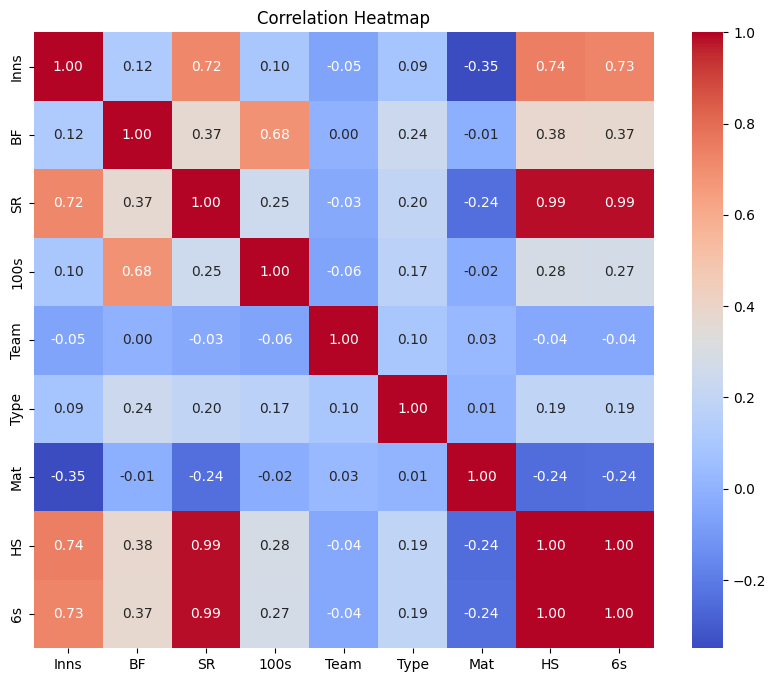

In [44]:
# Correlation heatmap
correlation_matrix = df[['Inns', 'BF', 'SR', '100s', 'Avg', 'Runs', 'Wkts',
                         'Team', 'Type', 'Mat', 'HS', '6s']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#**Related to Batsman**

#Batsman who will score the most runs


##Model Preparation

In [65]:
from sklearn.model_selection import train_test_split

# Selecting features and target variable
features = ['Inns', 'BF', '4s', '6s', 'Batting_Average', 'Strike_Rate']
target = 'HS'

# Splitting the data into train and test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Model building

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Ensuring all NaN values are filled in the feature set
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Building and fitting the model
model = RandomForestRegressor(n_estimators=100, random_state=20)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1835.5248169748697


##Saving model

In [67]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the label encoders (if they were used in preprocessing)
for col, encoder in label_encoders.items():
    with open(f'label_encoder_{col}.pkl', 'wb') as file:
        pickle.dump(encoder, file)


##Testing model

In [68]:
X_test.shape

(2109, 6)

In [69]:

X_new = pd.DataFrame(X_test)


# processing new data
# Applying the same preprocessing steps as done for the training data
X_new['BF'] = to_numeric_BF(X_new['BF'])
X_new['Inns'] = to_numeric(X_new['Inns'])
X_new['4s'] = to_numeric(X_new['4s'])
X_new['6s'] = to_numeric(X_new['6s'])
X_new.fillna(X_new.median(), inplace=True)


# Loading model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Making predictions
predicted_HS = loaded_model.predict(X_new)

# The predicted_HS array now contains the predicted High Score for each row in X_new
print(predicted_HS)


[5166.73    0.   1220.   ...   20.     53.      0.  ]


In [70]:
max_sc = max(list(predicted_HS))
print(max_sc)

9144.49


In [71]:
score = list(predicted_HS)
print('Index of the predicted high score batsman is :', score.index(9144.49))  # code to get batsman index

Index of the predicted high score batsman is : 349


In [72]:
index_to_find = 349  # Replace with your actual index
batsman_id = df.iloc[index_to_find]['Id']
print(f"The ID of the batsman at index {index_to_find} is {batsman_id}")


The ID of the batsman at index 349 is azmatullah omarzai 


#Batsman who will hit most sixes

##Model Preparation

In [119]:
from sklearn.model_selection import train_test_split

# Selecting features and target variable
features = ['Inns', 'BF', '4s', 'HS', 'Batting_Average', 'Strike_Rate']
target = '6s'

# Splitting the data into train and test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


##Model building

In [120]:
from sklearn.metrics import mean_squared_error


# Ensuring all NaN values are filled in the feature set
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Building and fitting the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 19.20756154575628


##Saving model

In [121]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the label encoders (if they were used in preprocessing)
for col, encoder in label_encoders.items():
    with open(f'label_encoder_{col}.pkl', 'wb') as file:
        pickle.dump(encoder, file)

# If there were other preprocessing steps whose parameters need to be saved, do that here


##Testing model

In [122]:
X_new = pd.DataFrame(X_test)


# Applying the same preprocessing steps as done for the training data
X_new['BF'] = to_numeric_BF(X_new['BF'])
X_new['Inns'] = to_numeric(X_new['Inns'])
X_new['4s'] = to_numeric(X_new['4s'])
X_new.fillna(X_new.median(), inplace=True)


# Loading model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Making predictions
predicted_sixes = loaded_model.predict(X_new)

# The predicted_sixes array now contains the predicted High Score for each row in X_new
print(predicted_sixes)


[ 0.   17.95 51.37 ...  0.   22.1   2.26]


In [123]:
max_sc = max(list(predicted_sixes))
print(max_sc)

853.34


In [124]:
score = list(predicted_sixes)
print('Index of the predicted high score batsman is :', score.index(853.34))  # code to get batsman index

Index of the predicted high score batsman is : 757


In [125]:
index_to_find = 757  # Replace with your actual index
batsman_id = df.iloc[index_to_find]['Id']
print(f"The ID of the batsman at index {index_to_find} is {batsman_id}")


The ID of the batsman at index 757 is matt henry 


#Batsman who will make the most centuries in the tournament.

##Model Preparation

In [239]:
df.head(2)

,Id,Team,Type,Career,Context,Span,Mat,Inns,HS,BF,SR,100s,50s,0s,4s,6s,Avg,NO,Overs,Mdns,Runs,Wkts,Econ,4w,5w,10w,BBI,BBM,Batting_Average,Strike_Rate
0,hashmatullah shahidi,0,7,8,170,0,147,6,375,53,833,45,0,1,0,46,200*,12,0,0,5,0,0,0,0,0,0,0,62.5,5.207547
1,hashmatullah shahidi,0,7,8,216,0,152,2,48,16,99,48,0,0,0,7,14,4,0,0,1,0,0,0,0,0,0,0,24.0,2.625000


In [240]:
from sklearn.model_selection import train_test_split

# Selecting features and target variable
features = ['Inns', 'BF', '6s', 'Batting_Average', 'Strike_Rate']
target = '100s'

# Splitting the data into train and test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Model building

In [241]:
from sklearn.metrics import mean_squared_error

X_train['6s'] = pd.to_numeric(X_train['6s'], errors='coerce')
X_test['6s'] = pd.to_numeric(X_test['6s'], errors='coerce')
# Ensuring all NaN values are filled in the feature set
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Building and fitting the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 107.3521431945996


##Saving model

In [242]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the label encoders (if they were used in preprocessing)
for col, encoder in label_encoders.items():
    with open(f'label_encoder_{col}.pkl', 'wb') as file:
        pickle.dump(encoder, file)

# If there were other preprocessing steps whose parameters need to be saved, do that here


##Testing model

In [243]:
X_test.shape

(2109, 5)

In [244]:
X_new = pd.DataFrame(X_test)

# processing new data
# Applying the same preprocessing steps as done for the training data
X_new['BF'] = to_numeric_BF(X_new['BF'])
X_new['Inns'] = to_numeric(X_new['Inns'])
X_new['6s'] = to_numeric(X_new['6s'])

X_new.fillna(X_new.median(), inplace=True)

# Loading model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Making predictions
predicted_centuries = loaded_model.predict(X_new)

# The predicted_centuries array now contains the predicted High Score for each row in X_new
print(predicted_centuries)


[48.48        0.         44.         ... 41.88399225 44.
  0.        ]


In [245]:
max_sc = max(list(predicted_centuries))
print(max_sc)

141.08


In [247]:
score = list(predicted_centuries)
print('Index of the predicted high score batsman is :', score.index(141.08))  # code to get batsman index

Index of the predicted high score batsman is : 1408


In [248]:
index_to_find = 1408  # Replace with your actual index
batsman_id = df.iloc[index_to_find]['Id']
print(f"The ID of the batsman at index {index_to_find} is {batsman_id}")


The ID of the batsman at index 1408 is steven smith 


#**Related to BOWLER**

##Predicting the bowler who will be the leading wicket-taker in the tournament.


##Model Preparation

In [174]:
df.head(2)

,Id,Team,Type,Career,Context,Span,Mat,Inns,HS,BF,SR,100s,50s,0s,4s,6s,Avg,NO,Overs,Mdns,Runs,Wkts,Econ,4w,5w,10w,BBI,BBM,Batting_Average,Strike_Rate
0,hashmatullah shahidi,0,7,8,170,0,147,6,375,53,833,45,0,1,0,46,200*,12,0,0,5,0,0,0,0,0,0,0,62.5,5.207547
1,hashmatullah shahidi,0,7,8,216,0,152,2,48,16,99,48,0,0,0,7,14,4,0,0,1,0,0,0,0,0,0,0,24.0,2.625000


In [271]:
from sklearn.model_selection import train_test_split

# Selecting features and target variable
features = ['Overs', 'Mdns', 'Econ', 'BBI', 'BBM']
target = 'Wkts'

# Splitting the data into train and test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Model building

In [272]:
from sklearn.metrics import mean_squared_error

# Ensuring all NaN values are filled in the feature set
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Building and fitting the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1726.088885526455


##Saving model

In [283]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the label encoders (if they were used in preprocessing)
for col, encoder in label_encoders.items():
    with open(f'label_encoder_{col}.pkl', 'wb') as file:
        pickle.dump(encoder, file)

# If there were other preprocessing steps whose parameters need to be saved, do that here


##Testing model

In [284]:
X_test.shape

(2109, 5)

In [285]:
X_new = pd.DataFrame(X_test)

X_new.fillna(X_new.median(), inplace=True)

# Loading model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Making predictions
predicted_bowler = loaded_model.predict(X_new)

# The predicted_bowler array now contains the predicted High Score for each row in X_new
print(predicted_bowler)


[   0.   1675.28    0.   ...    0.      0.     75.84]


In [286]:
max_bowler = max(list(predicted_bowler))
print(max_bowler)

11566.51


In [287]:
score_cent = list(predicted_bowler)
print('Index of the predicted leading wicket taker is :', score_cent.index(11566.51))   # code to get batsman index

Index of the predicted leading wicket taker is : 976


In [288]:
index_to_find = 976         # Replace with your actual index
bowler_id = df.iloc[index_to_find]['Id']
print(f"ID of the bowler predicted to take highest number of wicket is {bowler_id}")

ID of the bowler predicted to take highest number of wicket is rachin ravindra 
